In [2]:
# learned from https://github.com/Sentdex/nnfs and other blogs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forword(x, w, b):
    # y = mx+b
    return np.dot(x, w.T) + b

In [3]:
w = np.array([
    [11,12],
    [21,22],
    [31,32]
])
x = np.array([1,2])
b = [1,2,3]
print(np.dot(x,w.T) + b)

forword(x,w,b)

[36 67 98]


array([36, 67, 98])

In [4]:
def relu(value):
   # in a list greater than or equal 0 number is returned as it is 
   # below 0 values are returned as 0
   # eg I/P -> [1,0,-1,-0.2,5] O/P -> [1,0,0,0,5]
   return list(map(lambda a: a if a > 0 else 0, value))

In [5]:
a = [-1,0,1,2,-0.1,5]
print(relu(a))

[0, 0, 1, 2, 0, 5]


In [6]:
def createData():

    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 2 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,y

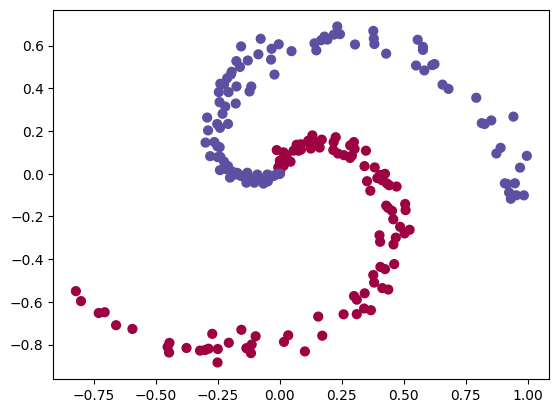

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[-0.  0.] 0


In [7]:
x,y = createData()
print(type(x), type(y))
print(x[0], y[0])

Why want to use softmax activation function?  
a = [  
    [1,2],  
    [-9.4, 2],  
    [-0.9,-0.8]  
]  
when we use relu as activation function in output layer for 1st value (1,2) it gives value as (1,2) because both are positive  
in 2nd example (-9.4, 2) relu will give op as (0, 2), in 3rd example (-0.9,-0.8) relu will give op as (0,0).   

Here in 2nd and 3rd example we loss how accurate the model.   

To solve the poroblem when we use absolute value  
    |-9.4| = 9.4  
    |2| = 2  
    In this example we clearly see that -9.4 is changes to 9.4 in this case the negative one wrong class but when we use absolute the prediction is wrong  

To solve the problem when we use square value  
  -9.4 * -9.4 = 88.36    
  2 * 2 = 4  
  in this example alse we loss the meaning 



What we want is a probability between 0 to 1 and also we want to normalize negative value to smaller positive value   

in below 1st example we can compute propobility of all numbers to between 0 to 1  
in 2nd example below we can change negative value to smaller positive value using e  

In [8]:
# example 1
total = sum([1,3,7,4])
print(total)

# total is 15
# 1 is  0.06666666666666667 % of 15
print(1/15)
# 3 is  0.2 % of 15
print(3/15)
# 7 is  0.4666666666666667 % of 15
print(7/15)
# 4 is  0.26666666666666666 % of 15
print(4/15)

# when we add all percent it will give 1

print( 0.06666666666666667 + 0.2 + 0.4666666666666667 + 0.26666666666666666 )

def probability(n):
    total = sum(n)
    return list(map(lambda a: a/total, n))

probability([1,3,7,4])

15
0.06666666666666667
0.2
0.4666666666666667
0.26666666666666666
1.0


[0.06666666666666667, 0.2, 0.4666666666666667, 0.26666666666666666]

In [9]:
print(sum(probability([1,3,-7,4])))
print(sum(probability([1,-3,-7,4])))
print(sum(probability([-3,-7,-4])))


1.0
0.9999999999999998
1.0


In [10]:
#example 2
# e of -2 is 0.1353352832366127
# e of -100 is 3.720075976020836e-44
# e of 100 is 2.6881171418161356e+43
# e of 2 is 7.38905609893065
np.exp(2)

def e(value):
    return np.exp(value)

e([1,2,-9]) # [2.71828183e+00, 7.38905610e+00, 1.23409804e-04]

array([2.71828183e+00, 7.38905610e+00, 1.23409804e-04])

A soft max is combination of propability and e  

In [11]:
def softmax(value):
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [12]:
softmax([1,2,3])

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]

In [13]:
softmax([-0.5, 9,6,1])

[7.12740586786693e-05,
 0.9522019539883128,
 0.04740734378322976,
 0.00031942816977882605]

In [14]:
softmax([1, 1000, 20])

# here is one problem of floating point value 
#np.exp(1000)  it will cause inf run time error to over come this issue we implement another statergy

/tmp/ipykernel_9161/2236011895.py:2: RuntimeWarning: overflow encountered in exp
  value = np.exp(value)
/tmp/ipykernel_9161/2236011895.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return list(map(lambda a: a / total, value))


[0.0, nan, 0.0]

To eliminate inf error find max value of list   
a = [1, 2, 3]  
max = 3  
subract each value with max  
a = [-2, -1, 0]  
and then proceed with older way  

In [15]:
def softmax(value):
    value = np.array(value) - max(value)
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [16]:
softmax([1,2,3]) # the result is same as the before

[0.09003057317038046, 0.24472847105479764, 0.6652409557748218]

In [17]:
softmax([-0.5, 9,6,1])

[7.127405867866931e-05,
 0.952201953988313,
 0.04740734378322978,
 0.00031942816977882616]

In [18]:
softmax([1, 1000, 20]) # here the problem is solved

[0.0, 1.0, 0.0]

In [88]:
softmax([1000, 1000, 200, -100])

[0.5, 0.5, 0.0, 0.0]

Loss function  
In classification problem output is not true or false but it is going to give probability of output  
so going to use special loss function called categorical coss entropy  

$L = -\sum\limits_{i=1}^{n}y_i*log(ypred_i)$

In [23]:
def categorical_cross_entropy(y,y_pred):
    '''
    y : one hot encoding [1, 0, 0] 
    y_pred:  It is softmax [0.7, 0.1,0.2]
    op = -(1 * log(0.7) + 0 * log(0.1) + 0 * log(0.2))
    op = -(1 * log(0.7) + 0 + 0)
    op = -log(0.7)
    op = -(−0.35667494393873245) = 0.35667494393873245
    '''
    return -np.log(y_pred[np.argmax(y)])

In [24]:
categorical_cross_entropy([1,0,0],[0.7,0.2,0.1])

0.35667494393873245

In [40]:
def categorical_cross_entropy(y,y_pred):
    '''
    y : one hot encoding corect class index [0, 1, 1] 
    y_pred:  It is softmax [[0.7, 0.1,0.2],[0.1, 0.5, 0.4], [0.02,0.9, 0.08]]
    y [0, 1, 1] = [[1,0,0],[0,1,0],[0,1,0]]
    op = -(log(0.7) + log(0.5) + log(0.9))
    op = -((-0.35667494393873245) + (-0.6931471805599453) + (-0.10536051565782628))
    op = 1.1551826401565042 / 3
    op = 0.38506088005216804
    '''
    return np.mean(-np.log(y_pred[range(len(y_pred)),y]))

In [9]:
pred = np.array([
    [0.7, 0.1,0.2],
    [0.1, 0.5, 0.4], 
    [0.02,0.9, 0.08]
    ])
correct_class = np.array([0,1,1])

# access row and column values
print(pred[[0,1,2],[0,0,0]])
print(pred[[0,1,2],[1,2,0]])


[0.7  0.1  0.02]
[0.1  0.4  0.02]


In [41]:
categorical_cross_entropy(correct_class, pred)

0.38506088005216804

In [3]:
# here is an problem log(0) is infinity that throws error

print(np.log(0))
print(np.log(1))

-inf
0.0


/tmp/ipykernel_2407/4050568738.py:3: RuntimeWarning: divide by zero encountered in log
  print(np.log(0))


In [49]:
np.clip([10,20,30,40,50,60,70,80,90,100],30,70)
# blow 30 and 30 is going to be 30
# above 70 and 70 is going to be 70

array([30, 30, 30, 40, 50, 60, 70, 70, 70, 70])

In [5]:
print(1-1e-7)
print(1.e-07 == 1e-7)

0.9999999
True


In [4]:
# 1e-7 = 1 × 10^-7 = 0.0000001
# 1-1e-7 = 1 - (1 × 10^-7) = 0.9999999
# 0 < 0.0000001 so answer is 0.0000001
# 0.2 > 0.0000001 && 0.2 < 0.9999999 so answer is 0.2
# -0.1 < 0.0000001 so answer is 0.0000001
# 0.9 > 0.0000001 && 0.9 < 0.9999999 so answer is 0.9
# 1.0 > 0.0000001 && 1.0 > 0.9999999 so answer is 0.9999999
np.clip([0,0.2,-0.1, 0.9, 1.0], 1e-7, 1-1e-7)

array([1.000000e-07, 2.000000e-01, 1.000000e-07, 9.000000e-01,
       9.999999e-01])

In [6]:
def categorical_cross_entropy(y,y_pred):
    ypred = np.clip(y_pred, 1e-7, 1-1e-7)
    if len(y.shape) == 1:
        # it is like above
        return np.mean(-np.log(y_pred[range(len(y_pred)),y]))
    elif len(y.shape) == 2:
        '''
        ypred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ]
        ypred * y = [
            [0.7, 0,0],
            [0,0.5,0],
            [0,0.9,0]
            ]
        sum of row axis will give [0.7, 0.5,0.9] 
        '''
        return np.mean(-np.log(np.sum(y_pred * y, axis=1)))
    return


In [10]:
categorical_cross_entropy(correct_class, pred)

0.38506088005216804

In [13]:
pred = np.array([
    [0.7, 0.1,0.2],
    [0.1, 0.5, 0.4], 
    [0.02,0.9, 0.08]
    ])
correct_class = np.array([[1,0,0],[0,1,0],[0,1,0]])
categorical_cross_entropy(correct_class, pred)

0.38506088005216804

In [28]:
def accuracy(y,y_pred):
    if len(y.shape) == 1:
        '''
        y_pred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [0,1,1]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == y)
    elif len(y.shape) == 2:
        '''
          ypred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    return


In [29]:
ypred = np.array([
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ])
y = np.array([
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ])
print(np.argmax(ypred, axis=1))
print(np.argmax(y, axis=1))

print(accuracy(y, ypred))
y = np.array([0,1,1])
print(accuracy(y, ypred))

[0 1 1]
[0 1 1]
1.0
1.0


In [44]:
def binaryCrossEntropyLoss(y, y_pred):
    res = []
    for i in range(len(y)):
        res.append(-((y[i]) * np.log(y_pred[i]) + ((1-y[i]) * np.log(1-y_pred[i]))))
    return np.mean(res)

In [46]:
x = [0.7,0.2,0.5,0.9,0.3]
y = [1,0,1,1,0]

print(binaryCrossEntropyLoss(y,x))

0.34700022708188927
